In [ ]:
#Angelo, Carter Faust, Adam Dessouky, Pauline Roth

#ECON 570 Final prject
##Predicting a Song's "Hit" Billboard 100 status.
###Angelo Carrasco, Carter Faust, Adam Dessouky, Pauline Roth

##**I** Introduction
###**a)** What question are you answering with your project?
####This project runs a statistical analysis on popular music of the past half-century. By examining a combination of objective and subjective musical characteristics (key, tempo, danceability, energy, etc.), this analysis employs a sequence of predictive regressions to answer our **primary research question**: is popular music really formulaic, and, if so, can we predict which songs will become ‘hits’ based on their characteristics? 

####Using the results from the first research question/analysis, this project then addresses two secondary research topics. First, as the selected data includes music from 6 decades (the 1960s-2010s), this project then examines whether the primary musical components/contributors of 'hit' songs have changed over time. Second, should there be notable contributors to ‘hit’ songs, both in newer and older music, this will determine whether newer music has become increasingly formulaic (i.e. has the ratio of new music with ‘hit’ song characteristics continually increased?).


###**b)** Why should we care about this question?
####In the 21st century, the concept of formulaic popular music is not a novel topic. While predominant musical genres and artists change with each generation, critics always maintain the same complaints, routinely maligning the most popular songs for their derivative nature.  

####This issue becomes particularly salient, however, as modern critics state that it stems from a new, economic origin. Critics contend that this ostensible increase in modern, formulaic music represents yet another symptom of an economic climate marked by inordinate corporate power and greed. Most simply, these critics argue that the production of popular music has lost its focus on promoting artistry and free expression, and has instead become a method to satisfy the avarice of production companies and record labels.

####While musical phenomena like “industry plants” and “ghostwriting” substantiate this critique, the economic foundation for these claims remains largely unfounded. However, the underpinning argument that large corporations maintain undue power/influence over consumers is becoming increasingly popular, particularly among economists who support the efficiency of free and competitive markets. As such, this renders the selected topic of study particularly germane and helpful for gaining insight into the purported disconnect between powerful corporations and the consumers whom they claim to serve.

####Ultimately, having an anomaly detection algorithm to determine a songs 'hit' status could help streaming companies better prioritize songs from new artists' against mainstream, label-backed artists.


###**c)** Literature Review 
####Previous research has studied the economics of the music industry and how different attributes of a track can be indicators of song popularity. [Andrea Guo (2021)](https://www.proquest.com/docview/2577557283?pq-origsite=gscholar&fromopenview=true) used multiple machine learning algorithms (random forest, boosting tree, and neural networks) to examine predictability of music popularity based on track characteristics and artists provided by the Spotify Web API. The models all appeared to be over 80% successful in predicting whether the track was a hit, indicating that music producers may be able to produce hit tracks by focusing on certain attributes that have proven to be predictive of song popularity. This could have strong implications for both producers and consumers in the music industry. Producers may utilize machine learning models to inspire their music based on the musical characteristics that consumers demand the most, thereby generating greater profit while also creating greatest utility for consumers who are streaming the hits. 

####Similarly, [Kim and Oh (2021)](https://www.sciencedirect.com/science/article/pii/S0167923621000452) used Spotify’s Web API to develop a logit regression model to predict top-ten-hit-song likelihood. The findings suggest that a song’s acoustic features such as danceability have a strong relationship with consumers’ music choices. The authors argue that the music industry can employ machine learning models to develop songs that best align with consumer preferences and ultimately influence consumers’ listening habits. 

####[Bischoof et al (2009)](https://link.springer.com/chapter/10.1007/978-3-642-03348-3_8) studied the economics of hit prediction, specifically examining how musical hit prediction yields benefits for producers, artists, and consumers. Models can generate greatest profits for producers by predicting popularity of a song prior to its release. Artists can use these same models to identify the most suitable markets and target audiences for their songs, and choose lyrics or musical compositions that are most appealing to listeners. Listeners can also benefit from these predictive models by enjoying music that has been curated to their preferences and is most likely to be deemed a hit. 


##**II** Data
###**a)** Describe the source(s) of the data
####This project used [The Spotify Hit Predictor Dataset (1960-2019)](https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset) retrieved from Kaggle. The dataset was built using Spotify’s Web API. Spotify’s Web API returns data regarding albums, artists, genres, and track features. 

####The dataset includes a total of 6 csv files, each corresponding to a decade (1960s,1970s,1980s,1990s,2000s,2010s). Each decade contains a combination of subjective (determined through proprietary metrics) and objective characteristics, including, for example, track, artist, uri, danceability, energy, key, loudness, mode, etc,. More details about how these features are measured can be found on the [Spotify Web API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) reference page.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,os, sklearn.metrics as skm, seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
spotify10s = pd.read_csv('dataset-of-10s.csv')
spotify00s = pd.read_csv('dataset-of-00s.csv')
spotify90s = pd.read_csv('dataset-of-90s.csv')
spotify80s = pd.read_csv('dataset-of-80s.csv')
spotify70s = pd.read_csv('dataset-of-70s.csv')
spotify60s = pd.read_csv('dataset-of-60s.csv')

###**b)** Discuss whether you are removing any outlier from your data, or doing any other sampling restrictions
####We did not remove any outliers from our data. That said, we used a few transformational methods to address variables with skewed distributions, as we will see later in this notebook.

###**c)** Discuss whether you are transforming the data and/or merging/appending multiple datasets together.
####The original data source had the songs split into separate csv files, hence the six seperate dataframes (above). Before we merge the datasets together, we'd like to keep track of which decade each song comes from. A new “decade” column value was added to each dataframe, labeling each song within the dataframe with its respective musical decade. For example, each song within the 1960’s dataframe would possess a “decade” value of “60s”. Each modified dataset was concatenated into a master dataset, compiling all selected songs with identifiers for their respectives decades.

####Finally, since our objective is classiication, and classification models tend to do better with stadnardized features, we will be standardizing all of our predictor variables for training the models.

Create a decade column for each dataset, labeling the songs with their correct music era.

In [4]:
for data, era in zip([spotify10s,spotify00s,spotify90s,spotify80s,spotify70s,spotify60s],['10s','00s','90s','80s','70s','60s',]):
    data['decade'] = era

Compile each era's dataset into one all-time dataset

In [5]:
spotifyAll = pd.concat([spotify10s,spotify00s,spotify90s,spotify80s,spotify70s,spotify60s], axis=0)

Make sure that there are no missing values, and that all columns are stored as numeric data types.

In [6]:
spotifyAll.isna().any()

track               False
artist              False
uri                 False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
chorus_hit          False
sections            False
target              False
decade              False
dtype: bool

In [30]:
spotifyAll.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
decade               object
dtype: object

####Now we can replace the strings in the decade column to be numberical representations, which will serve as a trend-control variable.

In [31]:
spotifyAll['decade'].replace({'60s': 1,'70s': 2,'80s': 3,'90s': 4,'00s': 5,'10s': 6},inplace=True)

###The variables included in the final dataset are as follows:

Track: The name of the track

Artist: The name of the artist

Uri: Resource identifier for the track

Danceability: How suitable a track is for dancing; range from 0-1

Energy: Measure of intensity and activity; range from 0-1

Key: The key of the track, using a 12 key structure (C-B)

Loudness: Loudness of a track, measured from -60db - 0db

Mode: Represents major or minor modality as a binary; major = 1

Speechiness: Presence of spoken words in a track; range from 0-1

Acousticness: How acoustic a track is; range from 0-1

Instrumentalness: Presence of vocals; range from 0-1

Liveness: Presence of an audience in the recording; range from 0-1

Valence: Musical postiveness of a track; range from 0-1

Tempo: Tempo of a track, measured in beats per minute

Duration: Duration of a track, measured in milliseconds

Time Signature: Time signature of a track, measured by beats in a measure

Chorus Hit: Measures when the chorus starts in a track

Sections: Number of sections a track has

Decade: Decade during which the track was released (refer to mapping above)

Target: Binary that determines if the song was a ‘hit’; hit = 0, flop = 1


In [32]:
spotifyAll

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.6260,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.706,108.029,188493,4,41.18681,10,1,6
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.2470,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.250,155.489,176880,3,33.18083,9,0,6
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.4150,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.274,172.065,205463,4,44.89147,9,1,6
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.6480,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.291,91.837,193043,4,29.52521,7,0,6
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.8870,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.780,160.517,144244,4,24.99199,8,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.80800,0.879000,0.3630,0.183,119.821,26244,4,0.00000,2,0,1
8638,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.66300,0.000000,0.1070,0.834,135.104,142987,4,28.34316,10,0,1
8639,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.94000,0.000178,0.1150,0.139,92.472,137200,4,56.63498,6,0,1
8640,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.65800,0.000000,0.7380,0.853,137.976,159107,3,28.24372,9,0,1


####Split into training and test sets before examining any summary statistics.

In [36]:
master2=spotifyAll.drop(['track', 'artist', 'uri'], axis=1)
y = master2['target']
X = master2.drop('target', axis =1)
x_split, x_test, y_split,y_test = train_test_split(X, y, train_size=.7)

###**d)** Show comprehensive summary statistics
####We have compiled general summary stastics of the variables (mean, std, quartile information, etc.), intervariable correlations, as well as some histograms and boxplots to illustrate the variables distributions.

####Histograms are displayed for raw, un-standardized varaibles, since histograms are the same for raw and standardized varaibles.

In [37]:
x_split.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
count,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,28774.000000,2.877400e+04,28774.000000,28774.000000,28774.000000,28774.000000
mean,0.539523,0.579286,5.214117,-10.255251,0.692813,0.072792,0.365859,0.156722,0.201155,0.542725,119.458561,2.341658e+05,3.892403,40.250852,10.434907,3.268020
std,0.178183,0.253412,3.535816,5.331751,0.461336,0.085463,0.339535,0.305617,0.173128,0.267869,29.166033,1.145694e+05,0.424253,19.173313,4.686678,1.742653
min,0.000000,0.000251,0.000000,-47.327000,0.000000,0.000000,0.000000,0.000000,0.013600,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,1.000000
25%,0.421000,0.396000,2.000000,-12.877750,0.000000,0.033700,0.040000,0.000000,0.093800,0.329000,97.411750,1.728572e+05,4.000000,27.651547,8.000000,2.000000
50%,0.552000,0.600000,5.000000,-9.296500,1.000000,0.043300,0.261000,0.000127,0.132000,0.559000,117.677000,2.174400e+05,4.000000,35.928350,10.000000,3.000000
75%,0.670000,0.788000,8.000000,-6.392000,1.000000,0.069900,0.678750,0.067075,0.260000,0.768000,136.888000,2.669298e+05,4.000000,47.850938,12.000000,5.000000
max,0.988000,1.000000,11.000000,2.291000,1.000000,0.960000,0.996000,0.999000,0.997000,0.996000,241.423000,3.816373e+06,5.000000,433.182000,145.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26051fa290>,
      dtype=object)

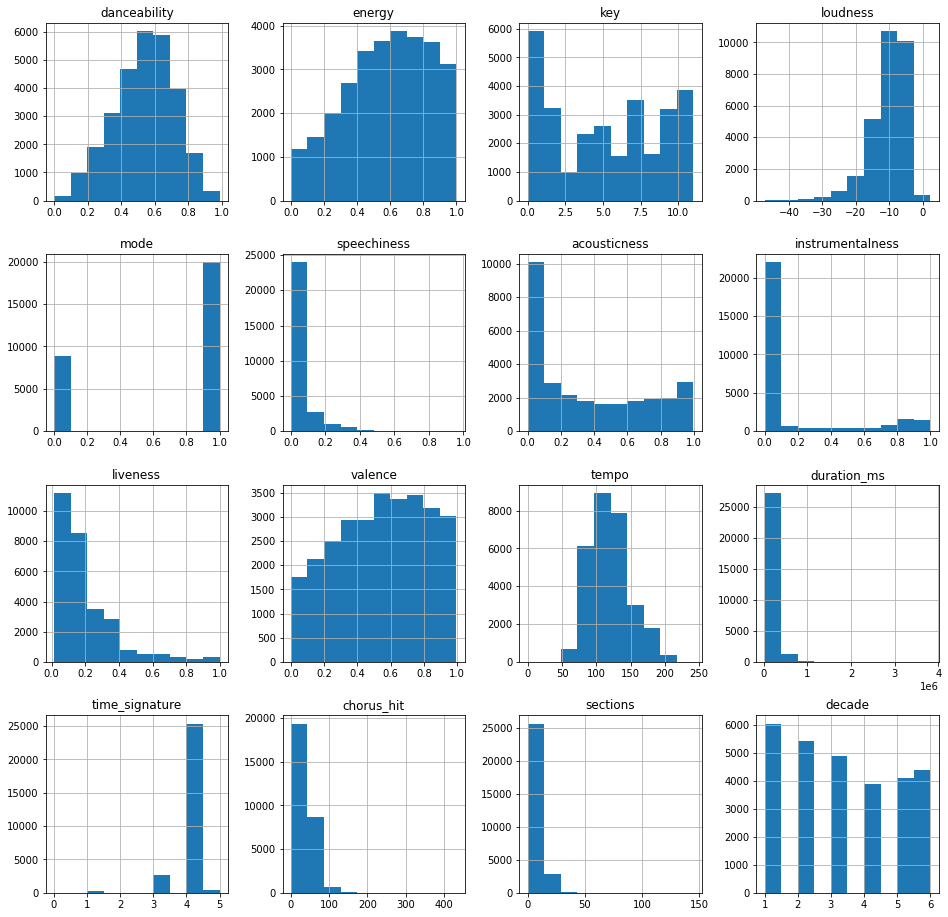

In [38]:
x_split.hist(figsize=(16,16))

####Standardize X according to the Z-score method:
###$\frac{X-\bar{x}}{\sigma^2_X}$

In [39]:
scaled = StandardScaler()
scaled.fit(x_split)
x_splitSc = pd.DataFrame(scaled.transform(x_split), index=x_split.index, columns=x_split.columns)

In [40]:
x_splitSc

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
1584,0.131759,-0.679876,-1.474683,-0.674602,0.665876,-0.432853,0.194801,-0.512815,-0.561184,-0.043772,-0.368845,0.100109,0.253620,-0.580592,0.547325,-0.727650
5492,-0.710087,-0.178708,0.787918,0.081823,0.665876,-0.455086,0.639535,-0.512815,-0.687683,0.146623,1.157820,-0.723817,0.253620,-0.149536,-0.306172,-1.301497
2944,-1.899896,-2.209821,0.505093,-3.876420,0.665876,-0.311161,1.785240,0.187421,-0.732737,-1.878284,-1.321442,-0.017159,2.610743,-0.496714,0.547325,0.420045
2675,-0.030998,-1.117905,0.787918,-0.975259,0.665876,-0.225743,1.001802,-0.512727,-0.729271,0.124224,-1.501518,-0.043807,0.253620,0.431210,-0.519547,-0.153802
2695,1.860349,0.069903,-0.060558,0.998423,-1.501781,-0.308821,-0.706447,-0.512439,-0.793387,0.344485,0.224252,-0.001447,0.253620,-1.168011,-0.092798,0.993893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,0.227168,0.109365,0.787918,0.064942,0.665876,-0.446895,-1.058287,-0.512777,1.090806,-0.626156,0.685310,-0.131563,0.253620,1.228194,-0.732921,-0.153802
3609,-0.979478,-0.044537,-0.909033,-0.198015,0.665876,-0.304140,-1.047802,-0.469623,2.130520,0.228755,-1.544342,1.817569,0.253620,-0.682516,1.400823,-0.153802
6131,1.568509,0.022548,0.787918,-0.237778,-1.501781,-0.390729,-0.908492,-0.512697,-0.825156,1.397257,-0.427922,0.697992,0.253620,-0.633287,0.547325,-0.153802
2677,-1.086111,-2.073282,-0.909033,-2.291923,-1.501781,-0.327543,0.869265,-0.512815,-0.359018,-1.048012,2.484764,-0.629314,2.610743,-0.320312,-0.946296,-1.301497


Check distribution of 'hit' status in our training set. It looks like we have a fairly even split.

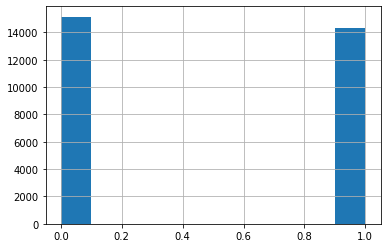

In [24]:
y_split.hist()

The correlation matrix indicates that there is not much correlation between the predictor varaibles, with the exception of the variable pairs energy-loudness and energy-acousticness. Even so, the correlations are not so strong so as to iply near-perfect collinearity, so the model should be unaffected for prediction and coefficient interpretation. 

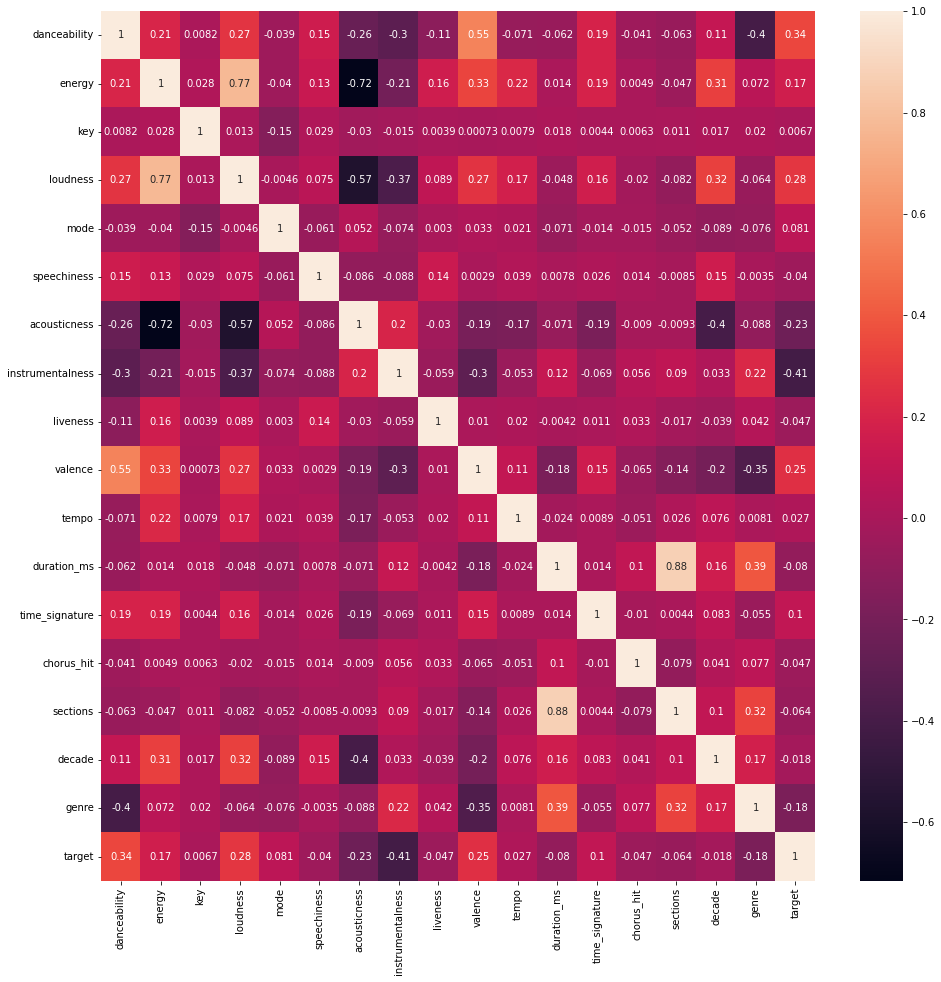

In [25]:
plt.figure(figsize=(16,16))
sb.heatmap(pd.concat([x_splitSc,y_split],axis=1).corr(),annot=True)

Here we print boxplots of each of the predictor variables for each of the target  classes. Notice how many of the variables are very skewed. This will be addressed later in our second model.

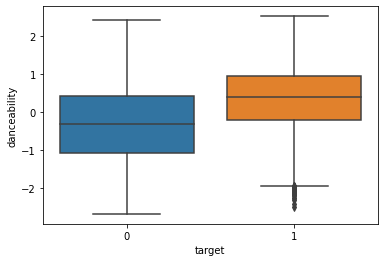

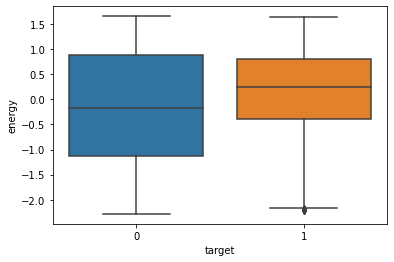

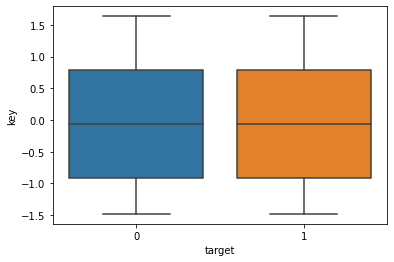

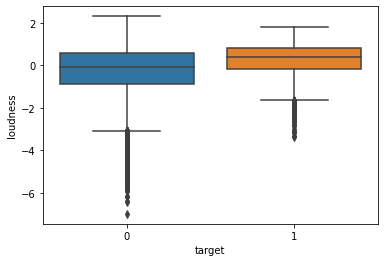

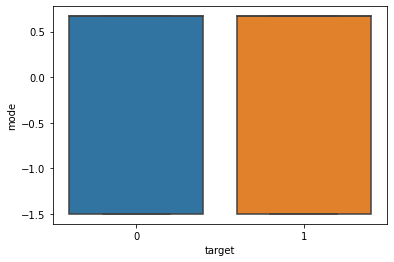

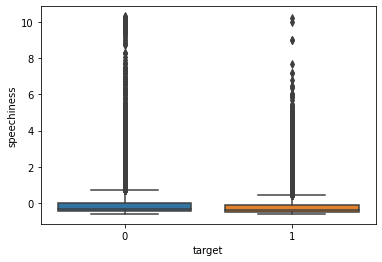

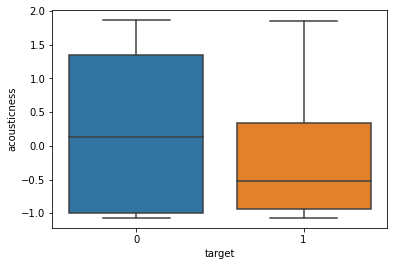

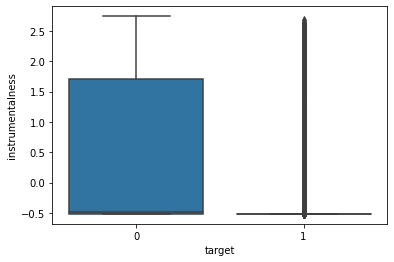

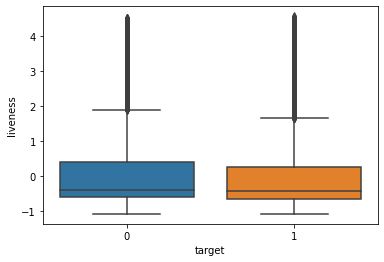

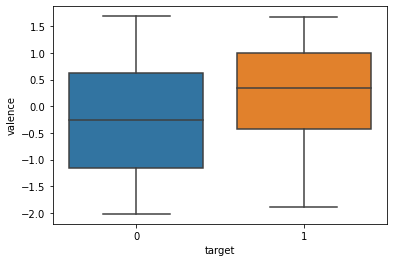

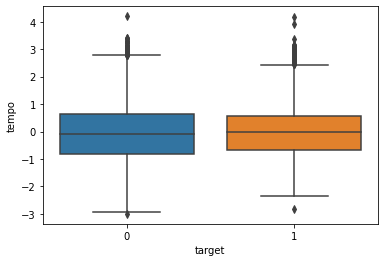

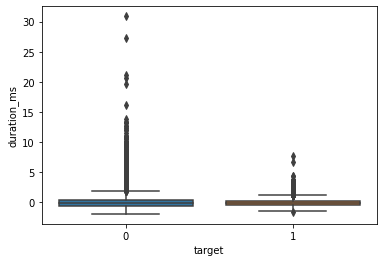

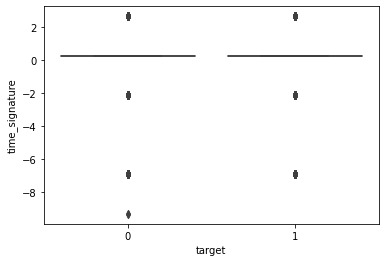

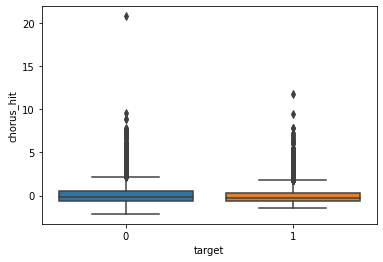

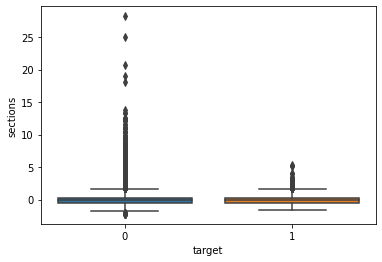

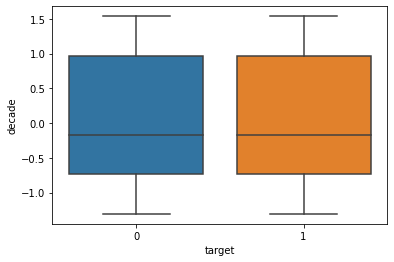

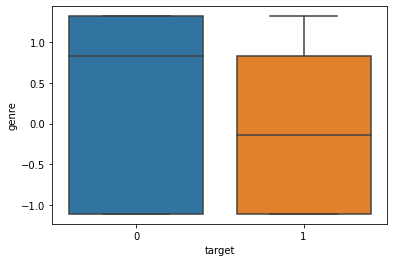

In [26]:
for c in x_splitSc.columns:
  sb.boxplot(x=y_split,y=x_splitSc[c])
  plt.show()

##III Modeling
###Model 1: Logistic Regression with Standardized Variables
###Model Formula: 

$Pr(Y_i=1|X_i) = {\frac{exp(\beta X)}{1 + exp (\beta X)}}$ with

$ln({\frac{Pr(Y_i=1|X_i)}{1-Pr(Y_i=1|X_i)}}) = \beta X$

####Highly skewed variables have high variances, meaning values far from the mean may still have small z-scores. Transforming skewed variables to have normal distributions will increase the z-score for fringe values for each covariate. Thus, there are more pronounced relationships.

We need to find what level for $λ$ to choose for our regularized Logistic Regression Model. Loop through different increments for $λ$ using both Lasso and Ridge regression to choose the best model.

To prevent selecting a hyperparamter value that overfits the training data, we used cross validation with 10 folds to evaluate each model iteration.

NOTE: the input parameter C is inversely related to the hyperparamter $λ$ --> lower values of C will penalize the model more.

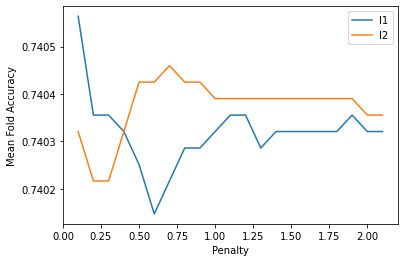

In [48]:
penalties = np.linspace(0,2,21)+0.1
for reg in ['l1','l2']:
  accuracies = []
  for pen in penalties:
    tempModel = LogisticRegression(penalty=reg, C=pen,solver='liblinear')
    results = cross_validate(tempModel,x_splitSc, y_split,cv=10)
    meanAccuracy = np.mean(results['test_score'])
    accuracies.append(meanAccuracy)
  plt.plot(penalties, accuracies, label=reg)
  plt.xlabel('Penalty')
  plt.ylabel('Mean Fold Accuracy')
plt.legend()

Althought Lasso regularization method yielded the absolute highest accuracy, it is likely that many of the regressors are penalized to zero, and we would also like to be able to interpret the coefficients. Since the Ridge regression's highest accuracy is marginally smaller than the highest Lasso accuracy, our final model will be a Logistic Ridge Classifcation with C=0.7.

In [66]:
reglogitAllXs = LogisticRegression(penalty='l2', C=0.7)
reglogitAllXs.fit(x_splitSc,y_split)
logitPredictions = reglogitAllXs.predict(x_testSc)
print('Accuracy:',reglogitAllXs.score(x_testSc,y_test))
model_coeff = pd.DataFrame({'Covariate':x_testSc.columns.tolist(),'Coefficient':reglogitAllXs.coef_.transpose().reshape(-1).tolist()})
model_coeff['OddsRatio'] = np.exp(model_coeff['Coefficient'])
print(model_coeff)

Accuracy: 0.7425397340253
           Covariate  Coefficient  OddsRatio
0       danceability     0.702213   2.018214
1             energy    -0.498704   0.607317
2                key     0.032709   1.033250
3           loudness     0.752411   2.122109
4               mode     0.167484   1.182326
5        speechiness    -0.233052   0.792112
6       acousticness    -0.607714   0.544595
7   instrumentalness    -1.037889   0.354201
8           liveness    -0.048974   0.952206
9            valence    -0.064232   0.937787
10             tempo     0.072305   1.074983
11       duration_ms     0.041520   1.042394
12    time_signature     0.074229   1.077053
13        chorus_hit    -0.030674   0.969791
14          sections    -0.094314   0.909997
15            decade    -0.426310   0.652914


Recall: 0.7179202001946337
Precision: 0.8183835182250396


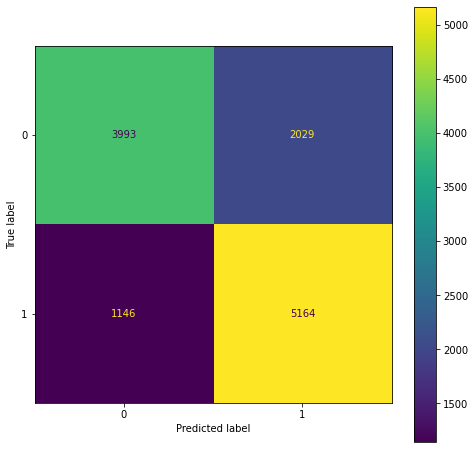

In [67]:
cm = skm.confusion_matrix(y_test,logitPredictions, labels=reglogitAllXs.classes_)
conf = skm.ConfusionMatrixDisplay(cm, display_labels=reglogitAllXs.classes_)
fig, ax = plt.subplots(figsize=(8,8))
conf.plot(ax=ax)
print('Recall:',skm.precision_score(y_test,logitPredictions))
print('Precision:',skm.recall_score(y_test,logitPredictions))

###Model 2: Transform the covariates to remove their skewness
###Theory:
####Highly skewed variables have high variances, meaning values far from the mean may still have small z-scores. Transforming skewed variables to have normal distributions will increase the z-score for fringe values for each covariate. Thus, there are more pronounced relationships.

####A number of transformation methods were used to adadress variables with right-skew distributions such as nth root (square root, cube root, etc.), logarithm, and the reciprocal. For left-skewed distributions, we reflected their tailedness to be right-skewed by finding the difference of thier value from the maximum. 

####Any constants added were done to prevent calculation errors at zero.

In [68]:
transfX_split = x_split.copy()
transfX_test = x_test.copy()
for data in [transfX_split,transfX_test]:
  data['rln_danceability'] = np.log((data['danceability'].max()+1)-data['danceability'])
  data['rln_energy'] = np.log((data['energy'].max()+1)-data['energy'])
  data['rln_loudness'] = np.power((data['loudness'].max()+1)-data['loudness'],0.5)
  data['cubeRT_speechiness'] = np.power(data['speechiness'],1/3)
  data['ln_liveness'] = np.log(data['liveness'])
  data['rcubeRT_valence'] = np.power((data['valence'].max()+1)-data['valence'],1/3)
  data['ln_duration_ms'] = np.log(data['duration_ms'])
  data['rln_time_signature'] = np.log((data['time_signature'].max()+1)-data['time_signature'])
  data['ln_chorus_hit'] = np.log(data['chorus_hit']+1)
  data['ln_sections'] = np.log(data['sections']+1)

In [69]:
transfX_split = transfX_split[['rln_danceability','rln_energy','key','rln_loudness','mode','cubeRT_speechiness','acousticness','instrumentalness','ln_liveness','rcubeRT_valence','tempo','ln_duration_ms','rln_time_signature','ln_chorus_hit','ln_sections','decade']]
transfX_test = transfX_test[['rln_danceability','rln_energy','key','rln_loudness','mode','cubeRT_speechiness','acousticness','instrumentalness','ln_liveness','rcubeRT_valence','tempo','ln_duration_ms','rln_time_signature','ln_chorus_hit','ln_sections','decade']]

###Notice how now most of the variables exhibit more normal distributions than before. THe exceptions being acousticness and instrumentalness, since none of our transformation efforts succeeded. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2601d33110>,
      dtype=object)

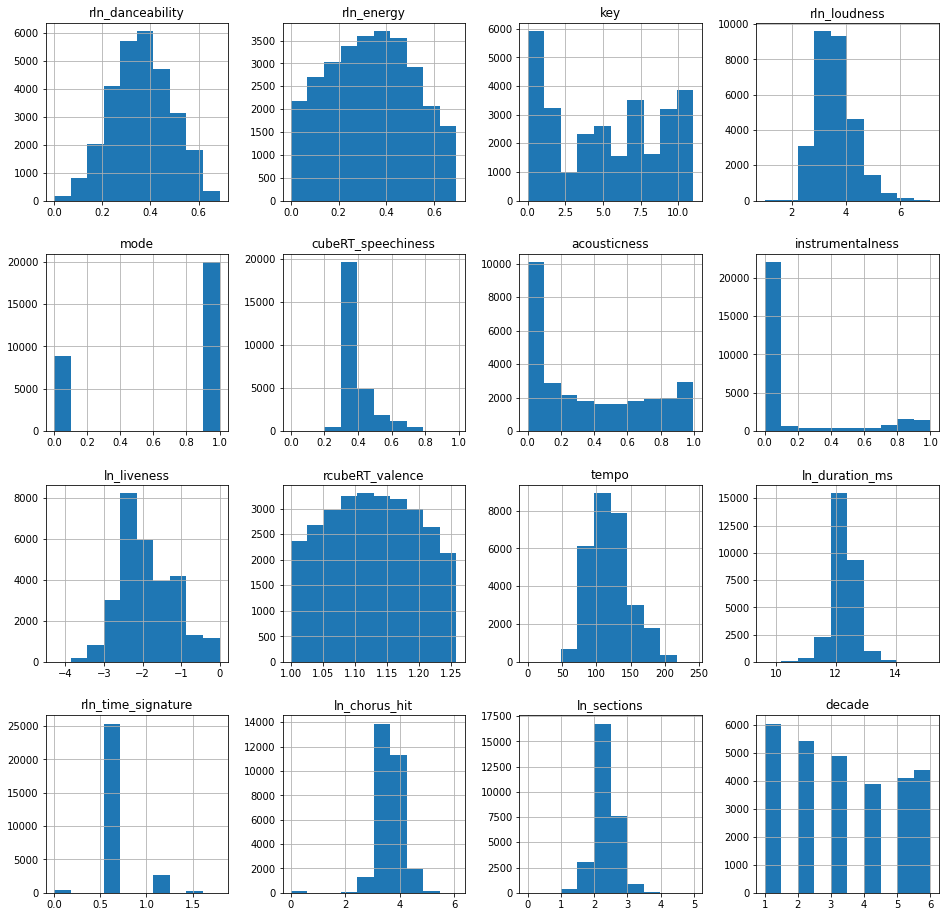

In [70]:
transfX_split.hist(figsize=(16,16))

Once again, standardize the variables.

In [71]:
transfScale = StandardScaler()
transfScale.fit(transfX_split)
transf_scale_x_split = pd.DataFrame(transfScale.transform(transfX_split), index=transfX_split.index, columns=transfX_split.columns)

Once again, loop through which regualrization method with which $\lambda$ most accurately estimates the data. 

Once again, we used cross validation with 10 folds to evaluate each model iteration.

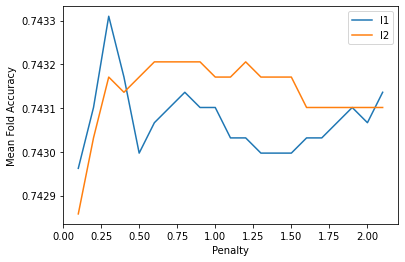

In [72]:
for reg in ['l1','l2']:
  accuracies = []
  for pen in penalties:
    tempModel = LogisticRegression(penalty=reg, C=pen,solver='liblinear')
    results = cross_validate(tempModel,transf_scale_x_split, y_split,cv=10)
    meanAccuracy = np.mean(results['test_score'])
    accuracies.append(meanAccuracy)
  plt.plot(penalties, accuracies, label=reg)
  plt.xlabel('Penalty')
  plt.ylabel('Mean Fold Accuracy')
plt.legend()

Lasso again had the highest average accuracy across the folds, but this time it was not at the lowest C-value, so it is likely that many of the paramters are not censored. Thus, our second choice of model will be Logistic Lasso Classification with C=0.3.

Now we need to transform the perdictors in the test set.

In [73]:
transf_scale_x_test = pd.DataFrame(transfScale.transform(transfX_test), index=transfX_test.index, columns=transfX_test.columns)

In [75]:
reglogitTransfXs = LogisticRegression(penalty='l1', C=0.3,solver='liblinear')
reglogitTransfXs.fit(transf_scale_x_split,y_split)
transfXsLogitPredict = reglogitTransfXs.predict(transf_scale_x_test)
print('Accuracy:', reglogitTransfXs.score(transf_scale_x_test,y_test))
transfModel_coeff = pd.DataFrame({'Covariate':transf_scale_x_test.columns.tolist(),'Coefficient':reglogitTransfXs.coef_.transpose().reshape(-1).tolist()})
transfModel_coeff['OddsRatio'] = np.exp(transfModel_coeff['Coefficient'])
print(transfModel_coeff)

Accuracy: 0.7431884528057088
             Covariate  Coefficient  OddsRatio
0     rln_danceability    -0.697087   0.498034
1           rln_energy     0.488113   1.629239
2                  key     0.033022   1.033573
3         rln_loudness    -0.717324   0.488056
4                 mode     0.169616   1.184850
5   cubeRT_speechiness    -0.302493   0.738974
6         acousticness    -0.593615   0.552327
7     instrumentalness    -1.054207   0.348469
8          ln_liveness    -0.041695   0.959162
9      rcubeRT_valence     0.042749   1.043676
10               tempo     0.087955   1.091939
11      ln_duration_ms     0.166666   1.181359
12  rln_time_signature    -0.066153   0.935987
13       ln_chorus_hit    -0.000477   0.999523
14         ln_sections    -0.083537   0.919857
15              decade    -0.440071   0.643990


####Notice how Accuracy virtually remained the same when compared to the first model. Recall increased slightly by about 3%, but Precision suffered with a decrease of almost 5%. 

Recall: 0.7468970934799686
Precision: 0.7534072900158478


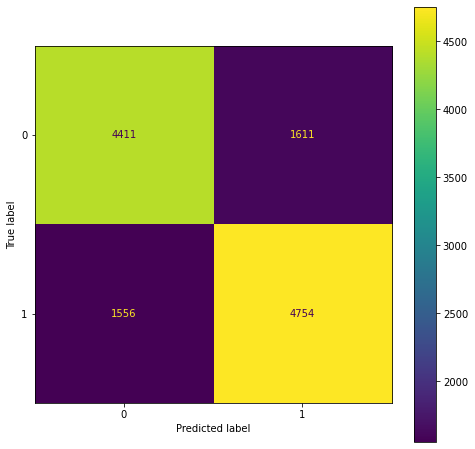

In [77]:
cm2 = skm.confusion_matrix(y_test,transfXsLogitPredict, labels=reglogitTransfXs.classes_)
conf2 = skm.ConfusionMatrixDisplay(cm2, display_labels=reglogitTransfXs.classes_)
fig2, ax2 = plt.subplots(figsize=(8,8))
conf2.plot(ax=ax2)
print('Recall:',skm.precision_score(y_test,transfXsLogitPredict))
print('Precision:',skm.recall_score(y_test,transfXsLogitPredict))

##**IV** Findings
###**a)**  and **b)** What are your main findings? What findings are different between the models?
####We found that "hit" songs can be formulaic. Our logistic regression model was able to predict the "hit"status of a song with around 74% accuracy for both models, which is significantly better than the traditional school of thought that predicting whether a particualr song would be a "hit", even from a popular artist, is like flipping a coin (which would be 50% accuracy). 

####One important observation is that the regularization configurations did not significantly change the performance of the model. Althought there are clear changes in accuracy across different values of $\lambda$ (via the input C), these variations represented changes in accuracy of less than 0.02%. Similarly, the differences between the Lasso ('l1') and the Ridge regularization methods also represented differences in accuracy of less than 0.02%. These findings were consistent across both the untransformed-predictor and the transformed-predictor models.

####Where the models differed was in the way they predicted the hit status of the song. Since the transformed-predictor model was deliberately designed to give larger weight to values farther from the mean, it is intuitive that the anomaly detection of Model 2 (Recall) was higher than that of the first model by 3%. However this is at the detriment of precision, or the reliablility of its anomaly detection capabilities. The first model had significantly better precision by nearly 5 percentage points at 81.83%. 

####Since variables from all models are standardized, each coefficient represents the change in log odds for every 1 standard deviation change in the predictor. 

####The coefficients for Model 1 indicate that the most significantly contributing predictors to a song's hit status are danceability, loudness, energy, instrumentalness, and acousticness, even when controlling for the decade the song was released in. The odds ratio column indicate that for every 1 increase in standard deviation danceability and loudness increase the odds ratio by a factor of over 2. Similarly, energy, instrumentalness, and acousticness decrease the odd ratio of a song becoming a hit. 

####Lastly, we lose ease of interpretability with the coefficients for Model 2 because of the transformations. But Model 2 is still useful for anomaly detection.


##**V** Conclusion
###**a)** What we've learned
####We've learned that songs can be forumlaically modeled to predict their 'hit' status. Not only that, but we've learned that we can predict their 'hit' status well, and that given the right model specification (Model 1 with simply standardized predictors) we can detect anomaly, "hit" songs with high reliability (Precision = 81.83%). Equally as important, we've learned that the danceability, loudness, energy, instrumentalness, and acousticness are factors of a song that make it formulaically related to its "hit" status. 
###**b)** Future Questions
####Although we found that a handful of song metrics largely contribute to a song's status, even controlling for the decade, it would be interesting to do the same analysis for each individual decade, to see if the exact odds-ratio relationship has changed across each musical era. In addition, the elephant-sized confounder that may be affecting the coefficient estimates is the amount of marketing money behind each song. 